# Librerias usadas

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Europa del Sur

Los paises conformados por Europa del Sur son Chipre Croacia, Eslovenia, España, Grecia, Italia, Malta, Portugal

#### Creacion del grafo para Europa del Sur, con sus aristas, y sus vertices

In [11]:
# Crear el grafo de Europa del Sur (solo países de la UE)
G = nx.Graph()

# Países de Europa del Sur que pertenecen a la Unión Europea
paises = [
    'Chipre',
    'Croacia',
    'Eslovenia',
    'España',
    'Grecia',
    'Italia',
    'Malta',
    'Portugal'
]

# Agregar nodos
G.add_nodes_from(paises)

# Agregar aristas (países que comparten frontera terrestre)
fronteras = [
    ('Portugal', 'España'),
    ('España', 'Italia'),  # Frontera marítima cercana
    ('Italia', 'Eslovenia'),
    ('Italia', 'Croacia'),  # Frontera marítima
    ('Eslovenia', 'Croacia'),
    ('Croacia', 'Grecia'),  # Conexión marítima (Mar Adriático/Jónico)
    ('Italia', 'Grecia'),  # Conexión marítima (Mar Jónico)
    ('Italia', 'Malta'),  # Proximidad marítima
    ('Grecia', 'Chipre'),  # Proximidad marítima (Mar Mediterráneo)
]

G.add_edges_from(fronteras)



#### Algoritmo para colorear el grafo, los colores y su funcion 

In [12]:
colores_disponibles = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', 
                       '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']

def colorear_grafo(grafo):
    """
    Algoritmo greedy para colorear el grafo.

    """
    coloreado = {}
    
    # Ordenar nodos por grado (mayor a menor) - estrategia Welsh-Powell
    nodos_ordenados = sorted(grafo.nodes(), 
                            key=lambda x: grafo.degree(x), 
                            reverse=True)
    
    for nodo in nodos_ordenados:
        # Colores usados por vecinos
        colores_vecinos = {coloreado[vecino] 
                          for vecino in grafo.neighbors(nodo) 
                          if vecino in coloreado}
        
        # Asignar el primer color disponible
        for color in colores_disponibles:
            if color not in colores_vecinos:
                coloreado[nodo] = color
                break
    
    return coloreado


#### Coloreado y vizualizacion

In [13]:
# Aplicar coloreado
coloreado = colorear_grafo(G)

# Calcular número cromático (cantidad de colores usados)
colores_usados = len(set(coloreado.values()))

# Visualización
plt.figure(figsize=(20, 20))

# Posición de los nodos (aproximada a ubicación geográfica)
pos = {
    'Portugal': (-2, 1),
    'España': (0, 1.5),
    'Italia': (2, 2),
    'Eslovenia': (2.5, 3),
    'Croacia': (4.5, 2.5),
    'Grecia': (4, 1),
    'Malta': (2.3, 1),
    'Chipre': (6, 0.5)
}

<Figure size 2000x2000 with 0 Axes>

#### Dibujo del grafo

C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\3463159542.py:52: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\3463159542.py:52: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()


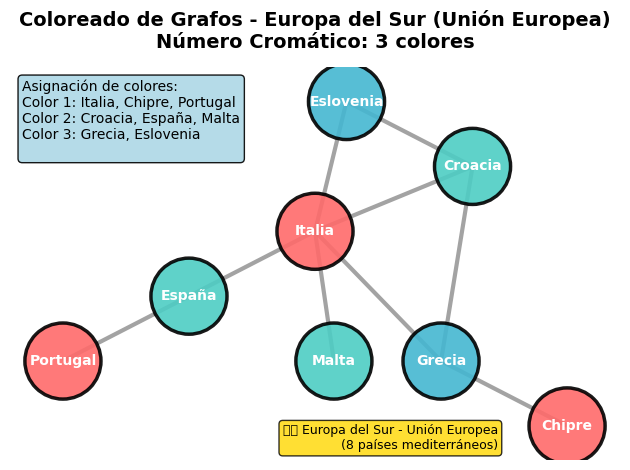

In [14]:
nx.draw_networkx_nodes(G, pos, 
                       node_color=[coloreado[nodo] for nodo in G.nodes()],
                       node_size=3000,
                       alpha=0.9,
                       edgecolors='black',
                       linewidths=2.5)

nx.draw_networkx_labels(G, pos, 
                        font_size=10,
                        font_weight='bold',
                        font_color='white')

nx.draw_networkx_edges(G, pos, 
                       width=3,
                       alpha=0.6,
                       edge_color='#666666')

# Título y información
plt.title(f'Coloreado de Grafos - Europa del Sur (Unión Europea)\n' + 
          f'Número Cromático: {colores_usados} colores',
          fontsize=14, fontweight='bold', pad=14)

# Leyenda de colores
colores_unicos = list(set(coloreado.values()))
paises_por_color = {}
for pais, color in coloreado.items():
    if color not in paises_por_color:
        paises_por_color[color] = []
    paises_por_color[color].append(pais)

# Crear leyenda con información de la UE
leyenda_texto = "Asignación de colores:\n"
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    leyenda_texto += f"Color {i}: {', '.join(paises_grupo)}\n"

plt.text(0.02, 0.97, leyenda_texto,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9))

# Nota sobre la UE
nota_ue = "🇪🇺 Europa del Sur - Unión Europea\n(8 países mediterráneos)"
plt.text(0.8,.02, nota_ue,
         transform=plt.gca().transAxes,
         fontsize=9,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

plt.axis('off')
plt.tight_layout()
plt.show()


#### Detalles

In [15]:
print("="*60)
print("RESULTADOS DEL COLOREADO DE GRAFOS")
print("="*60)
print(f"\nRegión: Europa del Sur (Unión Europea)")
print(f"Número de países: {len(paises)}")
print(f"Países incluidos: {', '.join(sorted(paises))}")
print(f"\nNúmero de fronteras: {G.number_of_edges()}")
print(f"Número cromático: {colores_usados}")
print("\nAsignación de colores:")
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    print(f"  Color {i}: {', '.join(paises_grupo)}")

print("\nGrado de cada nodo (número de vecinos):")
for nodo in sorted(G.nodes()):
    vecinos = list(G.neighbors(nodo))
    print(f"  {nodo}: {G.degree(nodo)} vecino(s)", end="")
    if vecinos:
        print(f" -> {', '.join(vecinos)}")
    else:
        print(" (nodo aislado)")

print("\n" + "="*60)
print("NOTA: Este grafo incluye países de la UE de la región")
print("del sur de Europa (Mediterráneo).")
print("Incluye fronteras terrestres y conexiones marítimas cercanas.")
print("="*60)

RESULTADOS DEL COLOREADO DE GRAFOS

Región: Europa del Sur (Unión Europea)
Número de países: 8
Países incluidos: Chipre, Croacia, Eslovenia, España, Grecia, Italia, Malta, Portugal

Número de fronteras: 9
Número cromático: 3

Asignación de colores:
  Color 1: Italia, Chipre, Portugal
  Color 2: Croacia, España, Malta
  Color 3: Grecia, Eslovenia

Grado de cada nodo (número de vecinos):
  Chipre: 1 vecino(s) -> Grecia
  Croacia: 3 vecino(s) -> Italia, Eslovenia, Grecia
  Eslovenia: 2 vecino(s) -> Italia, Croacia
  España: 2 vecino(s) -> Portugal, Italia
  Grecia: 3 vecino(s) -> Croacia, Italia, Chipre
  Italia: 5 vecino(s) -> España, Eslovenia, Croacia, Grecia, Malta
  Malta: 1 vecino(s) -> Italia
  Portugal: 1 vecino(s) -> España

NOTA: Este grafo incluye países de la UE de la región
del sur de Europa (Mediterráneo).
Incluye fronteras terrestres y conexiones marítimas cercanas.


#### Grado de Centralidad

In [16]:
degree_centrality = nx.degree_centrality(G)
print("\n1. CENTRALIDAD DE GRADO (Degree Centrality)")
print("   -" * 30)
for nodo in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"   {nodo[0]}: {nodo[1]:.3f}")


1. CENTRALIDAD DE GRADO (Degree Centrality)
   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
   Italia: 0.714
   Croacia: 0.429
   Grecia: 0.429
   Eslovenia: 0.286
   España: 0.286
   Chipre: 0.143
   Malta: 0.143
   Portugal: 0.143


# Europa Occidental

Los paises conformados por Europa Occidental que son Alemania, Austria, Bélgica, Francia, Luxemburgo, Países Bajos

#### Creacion del grafo para Europa Occidental, con sus aristas, y sus vertices

In [17]:
# Crear el grafo de Europa Occidental (solo países de la UE)
G = nx.Graph()

# Países de Europa Occidental que pertenecen a la Unión Europea
paises = [
    'Alemania',
    'Austria',
    'Bélgica',
    'Francia',
    'Luxemburgo',
    'Países Bajos'
]

# Agregar nodos
G.add_nodes_from(paises)

# Agregar aristas (países que comparten frontera terrestre)
fronteras = [
    ('Francia', 'Bélgica'),
    ('Francia', 'Luxemburgo'),
    ('Francia', 'Alemania'),
    ('Bélgica', 'Países Bajos'),
    ('Bélgica', 'Luxemburgo'),
    ('Bélgica', 'Alemania'),
    ('Países Bajos', 'Alemania'),
    ('Luxemburgo', 'Alemania'),
    ('Alemania', 'Austria'),
]

G.add_edges_from(fronteras)


#### Algoritmo para colorear el grafo, los colores y su funcion 

In [18]:
# Algoritmo de coloreado greedy
colores_disponibles = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', 
                       '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']

def colorear_grafo(grafo):
    """
    Algoritmo greedy para colorear el grafo.
    Retorna un diccionario con el color asignado a cada nodo.
    """
    coloreado = {}
    
    # Ordenar nodos por grado (mayor a menor) - estrategia Welsh-Powell
    nodos_ordenados = sorted(grafo.nodes(), 
                            key=lambda x: grafo.degree(x), 
                            reverse=True)
    
    for nodo in nodos_ordenados:
        # Colores usados por vecinos
        colores_vecinos = {coloreado[vecino] 
                          for vecino in grafo.neighbors(nodo) 
                          if vecino in coloreado}
        
        # Asignar el primer color disponible
        for color in colores_disponibles:
            if color not in colores_vecinos:
                coloreado[nodo] = color
                break
    
    return coloreado

#### Coloreado y vizualizacion

In [19]:
# Aplicar coloreado
coloreado = colorear_grafo(G)

# Calcular número cromático (cantidad de colores usados)
colores_usados = len(set(coloreado.values()))

# Visualización
plt.figure(figsize=(15, 10))

# Posición de los nodos (aproximada a ubicación geográfica)
pos = {
    'Francia': (0, 1),
    'Bélgica': (1.5, 2),
    'Luxemburgo': (1.8, 1),
    'Países Bajos': (2, 3.2),
    'Alemania': (3, 2),
    'Austria': (4, 1)
}

<Figure size 1500x1000 with 0 Axes>

#### Dibujo del grafo

C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\4051652424.py:52: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\4051652424.py:52: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()


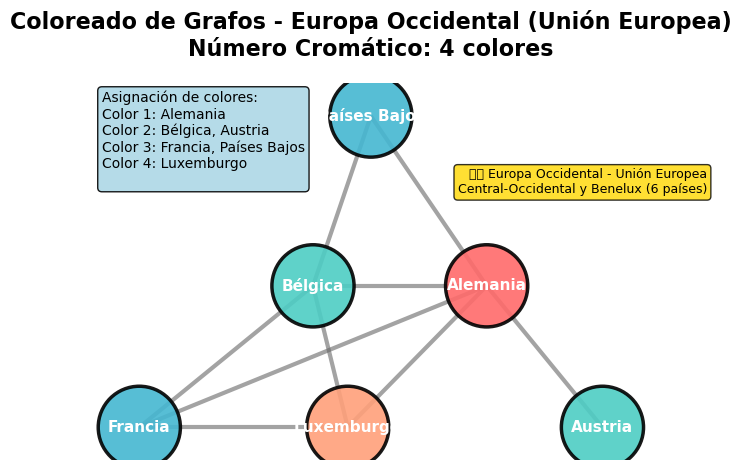

In [20]:
nx.draw_networkx_nodes(G, pos, 
                       node_color=[coloreado[nodo] for nodo in G.nodes()],
                       node_size=3500,
                       alpha=0.9,
                       edgecolors='black',
                       linewidths=2.5)

nx.draw_networkx_labels(G, pos, 
                        font_size=11,
                        font_weight='bold',
                        font_color='white')

nx.draw_networkx_edges(G, pos, 
                       width=3,
                       alpha=0.6,
                       edge_color='#666666')

# Título y información
plt.title(f'Coloreado de Grafos - Europa Occidental (Unión Europea)\n' + 
          f'Número Cromático: {colores_usados} colores',
          fontsize=16, fontweight='bold', pad=20)

# Leyenda de colores
colores_unicos = list(set(coloreado.values()))
paises_por_color = {}
for pais, color in coloreado.items():
    if color not in paises_por_color:
        paises_por_color[color] = []
    paises_por_color[color].append(pais)

# Crear leyenda con información de la UE
leyenda_texto = "Asignación de colores:\n"
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    leyenda_texto += f"Color {i}: {', '.join(paises_grupo)}\n"

plt.text(0.02, 0.98, leyenda_texto,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9))

# Nota sobre la UE
nota_ue = "🇪🇺 Europa Occidental - Unión Europea\nCentral-Occidental y Benelux (6 países)"
plt.text(1.1, 0.7, nota_ue,
         transform=plt.gca().transAxes,
         fontsize=9,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

plt.axis('off')
plt.tight_layout()
plt.show()

#### Detalles

In [21]:
# Imprimir resultados
print("="*60)
print("RESULTADOS DEL COLOREADO DE GRAFOS")
print("="*60)
print(f"\nRegión: Europa Occidental (Unión Europea)")
print(f"Subregiones: Europa Central-Occidental y Benelux")
print(f"Número de países: {len(paises)}")
print(f"Países incluidos: {', '.join(sorted(paises))}")
print(f"\nNúmero de fronteras: {G.number_of_edges()}")
print(f"Número cromático: {colores_usados}")
print("\nAsignación de colores:")
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    print(f"  Color {i}: {', '.join(paises_grupo)}")

print("\nGrado de cada nodo (número de vecinos):")
for nodo in sorted(G.nodes()):
    vecinos = list(G.neighbors(nodo))
    print(f"  {nodo}: {G.degree(nodo)} vecino(s)", end="")
    if vecinos:
        print(f" -> {', '.join(sorted(vecinos))}")
    else:
        print(" (nodo aislado)")

# Análisis adicional
print("\n" + "="*60)
print("ANÁLISIS ADICIONAL")
print("="*60)
print(f"\nPaíses Benelux: Bélgica, Países Bajos, Luxemburgo")
print(f"País con más fronteras: ", end="")
max_grado = max(G.degree(nodo) for nodo in G.nodes())
paises_max = [nodo for nodo in G.nodes() if G.degree(nodo) == max_grado]
print(f"{', '.join(paises_max)} ({max_grado} fronteras)")

print("\n" + "="*60)
print("NOTA: Este grafo incluye países de Europa Occidental:")
print("- Región Central-Occidental (Alemania, Austria, Francia)")
print("- Región Benelux (Bélgica, Países Bajos, Luxemburgo)")
print("="*60)

RESULTADOS DEL COLOREADO DE GRAFOS

Región: Europa Occidental (Unión Europea)
Subregiones: Europa Central-Occidental y Benelux
Número de países: 6
Países incluidos: Alemania, Austria, Bélgica, Francia, Luxemburgo, Países Bajos

Número de fronteras: 9
Número cromático: 4

Asignación de colores:
  Color 1: Alemania
  Color 2: Bélgica, Austria
  Color 3: Francia, Países Bajos
  Color 4: Luxemburgo

Grado de cada nodo (número de vecinos):
  Alemania: 5 vecino(s) -> Austria, Bélgica, Francia, Luxemburgo, Países Bajos
  Austria: 1 vecino(s) -> Alemania
  Bélgica: 4 vecino(s) -> Alemania, Francia, Luxemburgo, Países Bajos
  Francia: 3 vecino(s) -> Alemania, Bélgica, Luxemburgo
  Luxemburgo: 3 vecino(s) -> Alemania, Bélgica, Francia
  Países Bajos: 2 vecino(s) -> Alemania, Bélgica

ANÁLISIS ADICIONAL

Países Benelux: Bélgica, Países Bajos, Luxemburgo
País con más fronteras: Alemania (5 fronteras)

NOTA: Este grafo incluye países de Europa Occidental:
- Región Central-Occidental (Alemania, Aust

#### Grado de Centralidad

In [22]:
degree_centrality = nx.degree_centrality(G)
print("\n1. CENTRALIDAD DE GRADO (Degree Centrality)")
print("   -" * 30)
for nodo in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"   {nodo[0]}: {nodo[1]:.3f}")


1. CENTRALIDAD DE GRADO (Degree Centrality)
   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
   Alemania: 1.000
   Bélgica: 0.800
   Francia: 0.600
   Luxemburgo: 0.600
   Países Bajos: 0.400
   Austria: 0.200


# Europa del Norte

Los paises conformados por Europa del Norte que son Dinamarca, Estonia, Finlandia, Irlanda, Letonia, Lituania, Suecia

#### Creacion del grafo para Europa del Norte, con sus aristas, y sus vertices

In [23]:
G = nx.Graph()

# Países de Europa del Norte que pertenecen a la Unión Europea
paises = [
    'Dinamarca',
    'Estonia',
    'Finlandia',
    'Irlanda',
    'Letonia',
    'Lituania',
    'Suecia'
]

# Agregar nodos
G.add_nodes_from(paises)

# Agregar aristas (países que comparten frontera terrestre o marítima cercana)
fronteras = [
    ('Dinamarca', 'Suecia'),  # Puente de Öresund
    ('Suecia', 'Finlandia'),  # Frontera terrestre histórica y conexión estrecha
    ('Estonia', 'Letonia'),
    ('Letonia', 'Lituania'),
    ('Finlandia', 'Estonia'),  # Golfo de Finlandia (conexión marítima cercana)
    ('Suecia', 'Estonia'),  # Mar Báltico (conexión marítima)
    ('Suecia', 'Letonia'),  # Mar Báltico (conexión marítima)
    ('Suecia', 'Lituania'),  # Mar Báltico (conexión marítima)
]

G.add_edges_from(fronteras)

#### Algoritmo para colorear el grafo, los colores y su funcion 

In [24]:
colores_disponibles = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', 
                       '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']

def colorear_grafo(grafo):
    """
    Algoritmo greedy para colorear el grafo.
    Retorna un diccionario con el color asignado a cada nodo.
    """
    coloreado = {}
    
    # Ordenar nodos por grado (mayor a menor) - estrategia Welsh-Powell
    nodos_ordenados = sorted(grafo.nodes(), 
                            key=lambda x: grafo.degree(x), 
                            reverse=True)
    
    for nodo in nodos_ordenados:
        # Colores usados por vecinos
        colores_vecinos = {coloreado[vecino] 
                          for vecino in grafo.neighbors(nodo) 
                          if vecino in coloreado}
        
        # Asignar el primer color disponible
        for color in colores_disponibles:
            if color not in colores_vecinos:
                coloreado[nodo] = color
                break
    
    return coloreado

#### Coloreado y vizualizacion

In [25]:
# Aplicar coloreado
coloreado = colorear_grafo(G)

# Calcular número cromático (cantidad de colores usados)
colores_usados = len(set(coloreado.values()))

# Visualización
plt.figure(figsize=(20, 20))

# Posición de los nodos (aproximada a ubicación geográfica)
pos = {
    'Irlanda': (-0.5, 1.5),
    'Dinamarca': (0.5, 1.8),
    'Suecia': (1.5, 3),
    'Finlandia': (3, 3.5),
    'Estonia': (3, 2.3),
    'Letonia': (3, 1.5),
    'Lituania': (1.5, 1.5)
}

<Figure size 2000x2000 with 0 Axes>

#### Dibujo del grafo

C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\4152052336.py:53: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\4152052336.py:53: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()


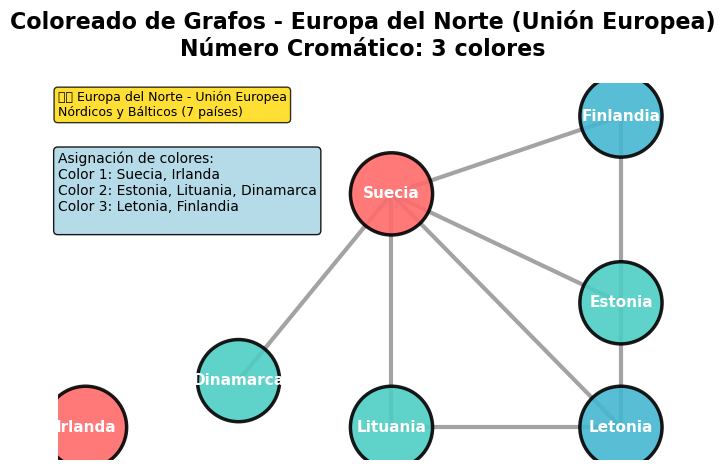

In [26]:
nx.draw_networkx_nodes(G, pos, 
                       node_color=[coloreado[nodo] for nodo in G.nodes()],
                       node_size=3500,
                       alpha=0.9,
                       edgecolors='black',
                       linewidths=2.5)

nx.draw_networkx_labels(G, pos, 
                        font_size=11,
                        font_weight='bold',
                        font_color='white')

nx.draw_networkx_edges(G, pos, 
                       width=3,
                       alpha=0.6,
                       edge_color='#666666')

# Título y información
plt.title(f'Coloreado de Grafos - Europa del Norte (Unión Europea)\n' + 
          f'Número Cromático: {colores_usados} colores',
          fontsize=16, fontweight='bold', pad=20)

# Leyenda de colores
colores_unicos = list(set(coloreado.values()))
paises_por_color = {}
for pais, color in coloreado.items():
    if color not in paises_por_color:
        paises_por_color[color] = []
    paises_por_color[color].append(pais)

# Nota sobre la UE
nota_ue = "🇪🇺 Europa del Norte - Unión Europea\nNórdicos y Bálticos (7 países)"
plt.text(0, 0.98, nota_ue,
         transform=plt.gca().transAxes,
         fontsize=9,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

# Crear leyenda con información de la UE (debajo de nota_ue)
leyenda_texto = "Asignación de colores:\n"
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    leyenda_texto += f"Color {i}: {', '.join(paises_grupo)}\n"

plt.text(0, 0.82, leyenda_texto,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9))

plt.axis('off')
plt.tight_layout()
plt.show()


#### Detalles

In [27]:
print("="*60)
print("RESULTADOS DEL COLOREADO DE GRAFOS")
print("="*60)
print(f"\nRegión: Europa del Norte (Unión Europea)")
print(f"Subregiones: Países Nórdicos y Estados Bálticos")
print(f"Número de países: {len(paises)}")
print(f"Países incluidos: {', '.join(sorted(paises))}")
print(f"\nNúmero de fronteras: {G.number_of_edges()}")
print(f"Número cromático: {colores_usados}")
print("\nAsignación de colores:")
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    print(f"  Color {i}: {', '.join(paises_grupo)}")

print("\nGrado de cada nodo (número de vecinos):")
for nodo in sorted(G.nodes()):
    vecinos = list(G.neighbors(nodo))
    print(f"  {nodo}: {G.degree(nodo)} vecino(s)", end="")
    if vecinos:
        print(f" -> {', '.join(sorted(vecinos))}")
    else:
        print(" (nodo aislado)")

# Análisis adicional
print("\n" + "="*60)
print("ANÁLISIS ADICIONAL")
print("="*60)
print(f"\nPaíses Nórdicos (UE): Dinamarca, Finlandia, Suecia")
print(f"Estados Bálticos: Estonia, Letonia, Lituania")
print(f"Otros: Irlanda")
print(f"\nPaís con más fronteras: ", end="")
max_grado = max(G.degree(nodo) for nodo in G.nodes())
paises_max = [nodo for nodo in G.nodes() if G.degree(nodo) == max_grado]
print(f"{', '.join(paises_max)} ({max_grado} fronteras)")

print(f"\nPaís(es) aislado(s): ", end="")
paises_aislados = [nodo for nodo in G.nodes() if G.degree(nodo) == 0]
if paises_aislados:
    print(f"{', '.join(paises_aislados)}")
else:
    print("Ninguno")

print("\n" + "="*60)
print("NOTA: Este grafo incluye países de Europa del Norte:")
print("- Países Nórdicos de la UE (Dinamarca, Finlandia, Suecia)")
print("- Estados Bálticos (Estonia, Letonia, Lituania)")
print("- Irlanda (país insular atlántico-nórdico)")
print("- Incluye fronteras terrestres y conexiones marítimas")
print("  significativas del Mar Báltico")
print("="*60)

RESULTADOS DEL COLOREADO DE GRAFOS

Región: Europa del Norte (Unión Europea)
Subregiones: Países Nórdicos y Estados Bálticos
Número de países: 7
Países incluidos: Dinamarca, Estonia, Finlandia, Irlanda, Letonia, Lituania, Suecia

Número de fronteras: 8
Número cromático: 3

Asignación de colores:
  Color 1: Suecia, Irlanda
  Color 2: Estonia, Lituania, Dinamarca
  Color 3: Letonia, Finlandia

Grado de cada nodo (número de vecinos):
  Dinamarca: 1 vecino(s) -> Suecia
  Estonia: 3 vecino(s) -> Finlandia, Letonia, Suecia
  Finlandia: 2 vecino(s) -> Estonia, Suecia
  Irlanda: 0 vecino(s) (nodo aislado)
  Letonia: 3 vecino(s) -> Estonia, Lituania, Suecia
  Lituania: 2 vecino(s) -> Letonia, Suecia
  Suecia: 5 vecino(s) -> Dinamarca, Estonia, Finlandia, Letonia, Lituania

ANÁLISIS ADICIONAL

Países Nórdicos (UE): Dinamarca, Finlandia, Suecia
Estados Bálticos: Estonia, Letonia, Lituania
Otros: Irlanda

País con más fronteras: Suecia (5 fronteras)

País(es) aislado(s): Irlanda

NOTA: Este grafo 

#### Grado de Centralidad

In [28]:
degree_centrality = nx.degree_centrality(G)
print("\n1. CENTRALIDAD DE GRADO (Degree Centrality)")
print("   -" * 30)
for nodo in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"   {nodo[0]}: {nodo[1]:.3f}")


1. CENTRALIDAD DE GRADO (Degree Centrality)
   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
   Suecia: 0.833
   Estonia: 0.500
   Letonia: 0.500
   Finlandia: 0.333
   Lituania: 0.333
   Dinamarca: 0.167
   Irlanda: 0.000


# Europa Central y del Este

Los paises conformados por Europa Europa Central y del Este son: Bulgaria, Eslovaquia, Hungría, Polonia, República Checa, Rumanía

#### Creacion del grafo para Europa Central y del Este, con sus aristas, y sus vertices

In [29]:
G = nx.Graph()

# Países de Europa Central y del Este que pertenecen a la Unión Europea
paises = [
    'Bulgaria',
    'Eslovaquia',
    'Hungría',
    'Polonia',
    'República Checa',
    'Rumanía'
]

# Agregar nodos
G.add_nodes_from(paises)

# Agregar aristas (países que comparten frontera terrestre)
fronteras = [
    ('Polonia', 'República Checa'),
    ('Polonia', 'Eslovaquia'),
    ('República Checa', 'Eslovaquia'),
    ('República Checa', 'Hungría'),  # Frontera corta pero existe
    ('Eslovaquia', 'Hungría'),
    ('Eslovaquia', 'Rumanía'),  # Frontera corta
    ('Hungría', 'Rumanía'),
    ('Rumanía', 'Bulgaria'),
]

G.add_edges_from(fronteras)

#### Algoritmo para colorear el grafo, los colores y su funcion 

In [30]:
colores_disponibles = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', 
                       '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']

def colorear_grafo(grafo):
    """
    Algoritmo greedy para colorear el grafo.
    Retorna un diccionario con el color asignado a cada nodo.
    """
    coloreado = {}
    
    # Ordenar nodos por grado (mayor a menor) - estrategia Welsh-Powell
    nodos_ordenados = sorted(grafo.nodes(), 
                            key=lambda x: grafo.degree(x), 
                            reverse=True)
    
    for nodo in nodos_ordenados:
        # Colores usados por vecinos
        colores_vecinos = {coloreado[vecino] 
                          for vecino in grafo.neighbors(nodo) 
                          if vecino in coloreado}
        
        # Asignar el primer color disponible
        for color in colores_disponibles:
            if color not in colores_vecinos:
                coloreado[nodo] = color
                break
    
    return coloreado

#### Coloreado y vizualizacion

In [31]:
# Aplicar coloreado
coloreado = colorear_grafo(G)

# Calcular número cromático (cantidad de colores usados)
colores_usados = len(set(coloreado.values()))

# Visualización
plt.figure(figsize=(15, 11))

# Posición de los nodos (aproximada a ubicación geográfica)
pos = {
    'Polonia': (1, 3),
    'República Checa': (0, 2),
    'Eslovaquia': (1, 1.8),
    'Hungría': (1, 0.3),
    'Rumanía': (2.5, 0.5),
    'Bulgaria': (2.5, -0.8)
}

<Figure size 1500x1100 with 0 Axes>

#### Dibujo del grafo

C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\3072036496.py:53: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\3072036496.py:53: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()


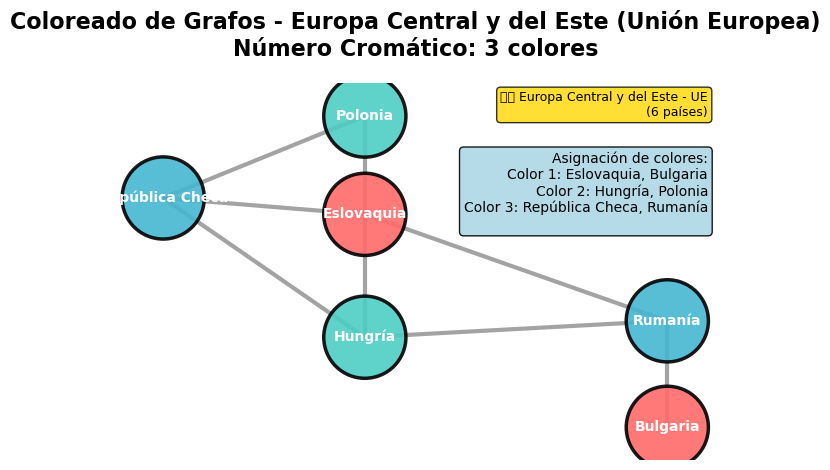

In [32]:
nx.draw_networkx_nodes(G, pos, 
                       node_color=[coloreado[nodo] for nodo in G.nodes()],
                       node_size=3500,
                       alpha=0.9,
                       edgecolors='black',
                       linewidths=2.5)

nx.draw_networkx_labels(G, pos, 
                        font_size=10,
                        font_weight='bold',
                        font_color='white')

nx.draw_networkx_edges(G, pos, 
                       width=3,
                       alpha=0.6,
                       edge_color='#666666')

# Título y información
plt.title(f'Coloreado de Grafos - Europa Central y del Este (Unión Europea)\n' + 
          f'Número Cromático: {colores_usados} colores',
          fontsize=16, fontweight='bold', pad=20)

# Leyenda de colores
colores_unicos = list(set(coloreado.values()))
paises_por_color = {}
for pais, color in coloreado.items():
    if color not in paises_por_color:
        paises_por_color[color] = []
    paises_por_color[color].append(pais)

# Nota sobre la UE
nota_ue = "🇪🇺 Europa Central y del Este - UE\n(6 países)"
plt.text(0.98, 0.98, nota_ue,
         transform=plt.gca().transAxes,
         fontsize=9,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

# Crear leyenda con información de la UE (debajo de nota_ue)
leyenda_texto = "Asignación de colores:\n"
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    leyenda_texto += f"Color {i}: {', '.join(paises_grupo)}\n"

plt.text(0.98, 0.82, leyenda_texto,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9))

plt.axis('off')
plt.tight_layout()
plt.show()


#### Detalles

In [33]:
print("="*60)
print("RESULTADOS DEL COLOREADO DE GRAFOS")
print("="*60)
print(f"\nRegión: Europa Central y del Este (Unión Europea)")
print(f"Número de países: {len(paises)}")
print(f"Países incluidos: {', '.join(sorted(paises))}")
print(f"\nNúmero de fronteras: {G.number_of_edges()}")
print(f"Número cromático: {colores_usados}")
print("\nAsignación de colores:")
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    print(f"  Color {i}: {', '.join(paises_grupo)}")

print("\nGrado de cada nodo (número de vecinos):")
for nodo in sorted(G.nodes()):
    vecinos = list(G.neighbors(nodo))
    print(f"  {nodo}: {G.degree(nodo)} vecino(s)", end="")
    if vecinos:
        print(f" -> {', '.join(sorted(vecinos))}")
    else:
        print(" (nodo aislado)")

# Análisis adicional
print("\n" + "="*60)
print("ANÁLISIS ADICIONAL")
print("="*60)
print(f"\nGrupo de Visegrado (V4): Polonia, República Checa,")
print(f"                         Eslovaquia, Hungría")
print(f"Países Balcánicos (UE): Bulgaria, Rumanía")

print(f"\nPaís con más fronteras: ", end="")
max_grado = max(G.degree(nodo) for nodo in G.nodes())
paises_max = [nodo for nodo in G.nodes() if G.degree(nodo) == max_grado]
print(f"{', '.join(paises_max)} ({max_grado} fronteras)")

print(f"\nPaís(es) aislado(s): ", end="")
paises_aislados = [nodo for nodo in G.nodes() if G.degree(nodo) == 0]
if paises_aislados:
    print(f"{', '.join(paises_aislados)}")
else:
    print("Ninguno")

print("\n" + "="*60)
print("NOTA: Este grafo incluye países de Europa Central y del Este:")
print("- Grupo de Visegrado: Polonia, República Checa,")
print("  Eslovaquia, Hungría")
print("- Europa del Este/Balcanes: Bulgaria, Rumanía")
print("- Todas las conexiones son fronteras terrestres")
print("="*60)

RESULTADOS DEL COLOREADO DE GRAFOS

Región: Europa Central y del Este (Unión Europea)
Número de países: 6
Países incluidos: Bulgaria, Eslovaquia, Hungría, Polonia, República Checa, Rumanía

Número de fronteras: 8
Número cromático: 3

Asignación de colores:
  Color 1: Eslovaquia, Bulgaria
  Color 2: Hungría, Polonia
  Color 3: República Checa, Rumanía

Grado de cada nodo (número de vecinos):
  Bulgaria: 1 vecino(s) -> Rumanía
  Eslovaquia: 4 vecino(s) -> Hungría, Polonia, República Checa, Rumanía
  Hungría: 3 vecino(s) -> Eslovaquia, República Checa, Rumanía
  Polonia: 2 vecino(s) -> Eslovaquia, República Checa
  República Checa: 3 vecino(s) -> Eslovaquia, Hungría, Polonia
  Rumanía: 3 vecino(s) -> Bulgaria, Eslovaquia, Hungría

ANÁLISIS ADICIONAL

Grupo de Visegrado (V4): Polonia, República Checa,
                         Eslovaquia, Hungría
Países Balcánicos (UE): Bulgaria, Rumanía

País con más fronteras: Eslovaquia (4 fronteras)

País(es) aislado(s): Ninguno

NOTA: Este grafo incluy

#### Grado de Centralidad

In [34]:
degree_centrality = nx.degree_centrality(G)
print("\n1. CENTRALIDAD DE GRADO (Degree Centrality)")
print("   -" * 30)
for nodo in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"   {nodo[0]}: {nodo[1]:.3f}")


1. CENTRALIDAD DE GRADO (Degree Centrality)
   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
   Eslovaquia: 0.800
   Hungría: 0.600
   República Checa: 0.600
   Rumanía: 0.600
   Polonia: 0.400
   Bulgaria: 0.200


# Detalles para la Union Europea

C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\3008986814.py:189: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_24544\3008986814.py:189: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()


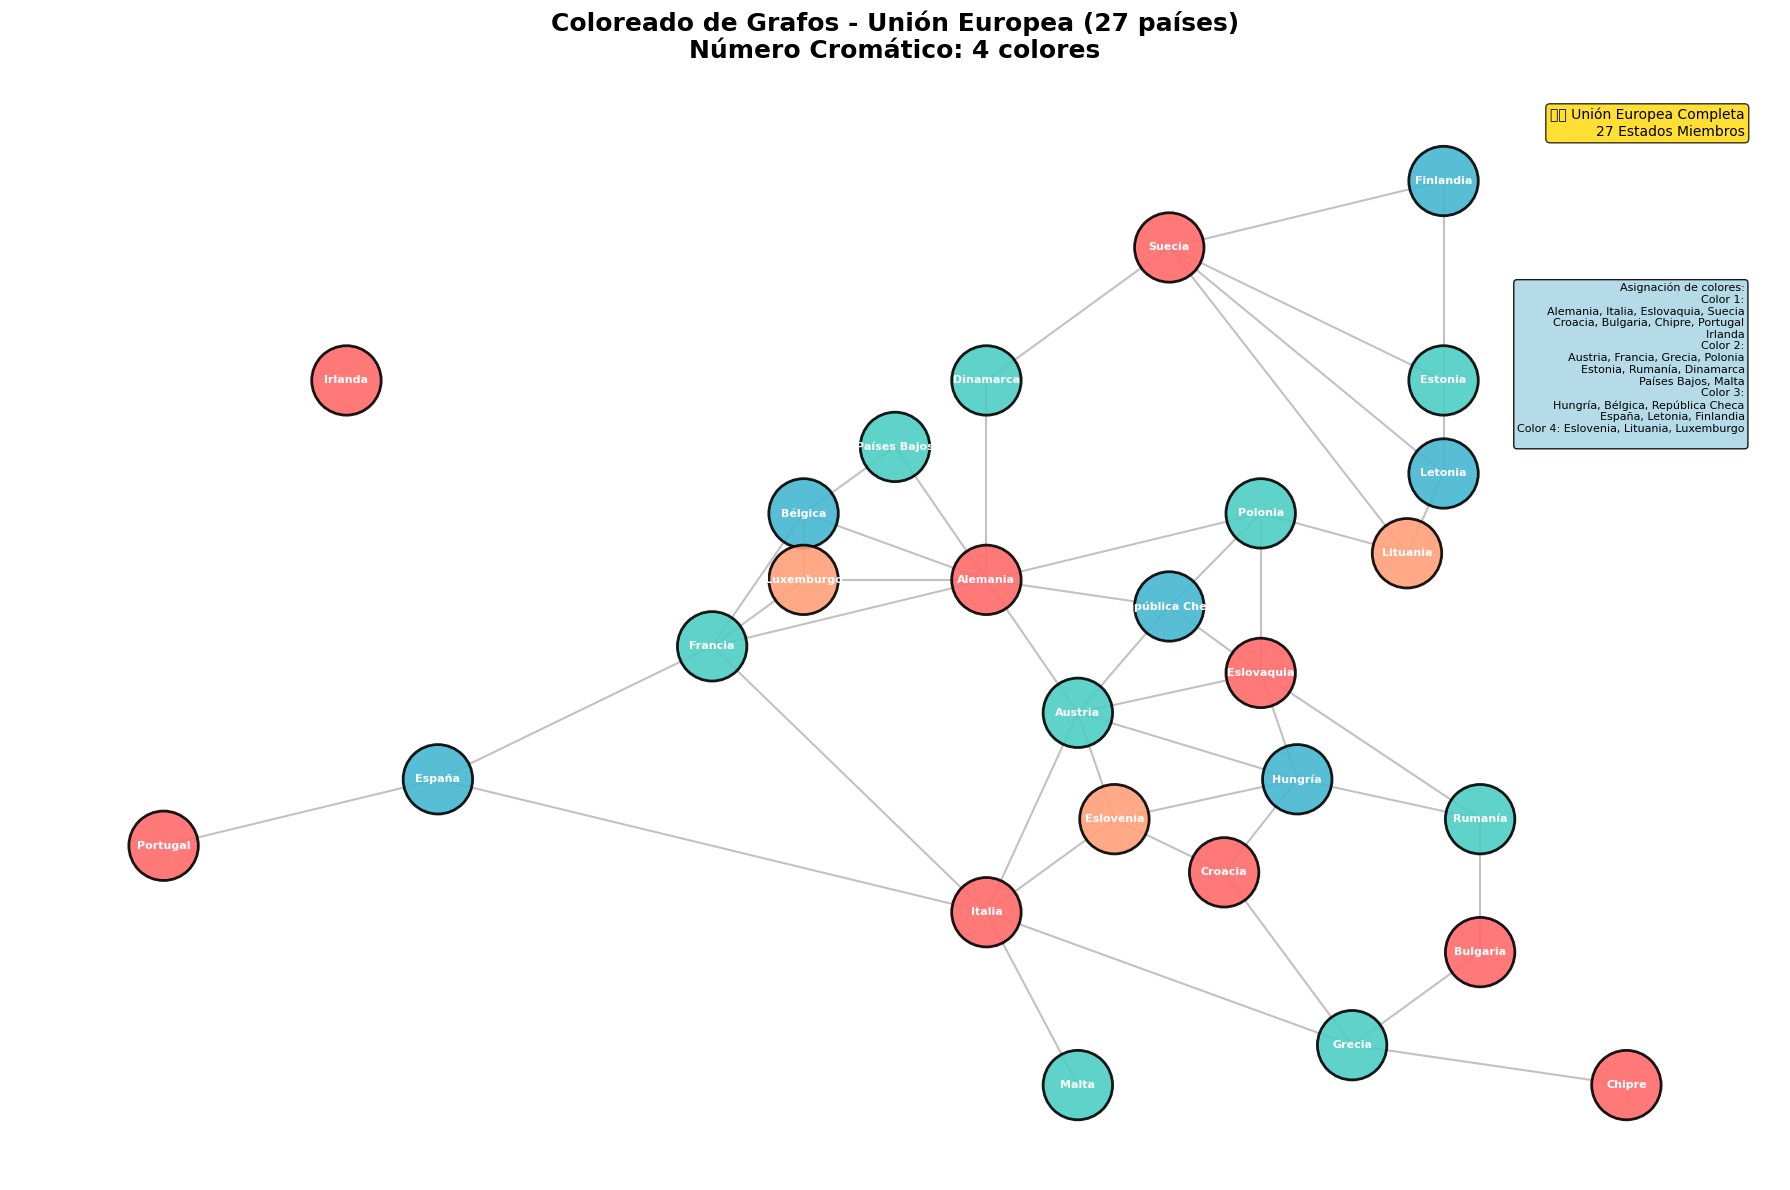

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo de toda la Unión Europea
G = nx.Graph()

# Los 27 países de la Unión Europea
paises = [
    'Alemania', 'Austria', 'Bélgica', 'Bulgaria', 'Chipre', 'Croacia',
    'Dinamarca', 'Eslovaquia', 'Eslovenia', 'España', 'Estonia', 'Finlandia',
    'Francia', 'Grecia', 'Hungría', 'Irlanda', 'Italia', 'Letonia',
    'Lituania', 'Luxemburgo', 'Malta', 'Países Bajos', 'Polonia',
    'Portugal', 'República Checa', 'Rumanía', 'Suecia'
]

# Agregar nodos
G.add_nodes_from(paises)

# Agregar aristas (países que comparten frontera terrestre o conexión marítima cercana)
fronteras = [
    # Europa Occidental
    ('Francia', 'Bélgica'), ('Francia', 'Luxemburgo'), ('Francia', 'Alemania'),
    ('Francia', 'Italia'), ('Francia', 'España'),
    ('Bélgica', 'Países Bajos'), ('Bélgica', 'Luxemburgo'), ('Bélgica', 'Alemania'),
    ('Países Bajos', 'Alemania'), ('Luxemburgo', 'Alemania'),
    ('Alemania', 'Austria'), ('Alemania', 'República Checa'), ('Alemania', 'Polonia'),
    ('Alemania', 'Dinamarca'),
    
    # Europa del Sur
    ('Portugal', 'España'), ('España', 'Italia'),
    ('Italia', 'Eslovenia'), ('Italia', 'Austria'), ('Italia', 'Grecia'), ('Italia', 'Malta'),
    ('Eslovenia', 'Croacia'), ('Eslovenia', 'Austria'), ('Eslovenia', 'Hungría'),
    ('Croacia', 'Hungría'), ('Croacia', 'Grecia'),
    ('Grecia', 'Bulgaria'), ('Grecia', 'Chipre'),
    
    # Europa Central y del Este
    ('Polonia', 'República Checa'), ('Polonia', 'Eslovaquia'), ('Polonia', 'Lituania'),
    ('República Checa', 'Eslovaquia'), ('República Checa', 'Austria'),
    ('Eslovaquia', 'Hungría'), ('Eslovaquia', 'Austria'), ('Eslovaquia', 'Rumanía'),
    ('Hungría', 'Rumanía'), ('Hungría', 'Austria'),
    ('Rumanía', 'Bulgaria'),
    
    # Europa del Norte
    ('Dinamarca', 'Suecia'),
    ('Suecia', 'Finlandia'), ('Suecia', 'Estonia'), ('Suecia', 'Letonia'), ('Suecia', 'Lituania'),
    ('Estonia', 'Letonia'), ('Estonia', 'Finlandia'),
    ('Letonia', 'Lituania'),
]

G.add_edges_from(fronteras)

# Algoritmo de coloreado greedy
colores_disponibles = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', 
                       '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2',
                       '#FF8FAB', '#6C5CE7', '#00B894', '#FDCB6E']

def colorear_grafo(grafo):
    """
    Algoritmo greedy para colorear el grafo.
    Retorna un diccionario con el color asignado a cada nodo.
    """
    coloreado = {}
    
    # Ordenar nodos por grado (mayor a menor) - estrategia Welsh-Powell
    nodos_ordenados = sorted(grafo.nodes(), 
                            key=lambda x: grafo.degree(x), 
                            reverse=True)
    
    for nodo in nodos_ordenados:
        # Colores usados por vecinos
        colores_vecinos = {coloreado[vecino] 
                          for vecino in grafo.neighbors(nodo) 
                          if vecino in coloreado}
        
        # Asignar el primer color disponible
        for color in colores_disponibles:
            if color not in colores_vecinos:
                coloreado[nodo] = color
                break
    
    return coloreado

# Aplicar coloreado
coloreado = colorear_grafo(G)

# Calcular número cromático (cantidad de colores usados)
colores_usados = len(set(coloreado.values()))

# Visualización
plt.figure(figsize=(18, 12))

# Posición de los nodos (aproximada a ubicación geográfica)
pos = {
    # Oeste
    'Portugal': (-3, 1), 'España': (-1.5, 1.5), 'Francia': (0, 2.5),
    'Irlanda': (-2, 4.5),
    
    # Benelux y Centro-Oeste
    'Bélgica': (0.5, 3.5), 'Luxemburgo': (0.5, 3), 'Países Bajos': (1, 4),
    
    # Norte
    'Dinamarca': (1.5, 4.5), 'Suecia': (2.5, 5.5), 'Finlandia': (4, 6),
    
    # Centro
    'Alemania': (1.5, 3), 'Austria': (2, 2), 'República Checa': (2.5, 2.8),
    'Polonia': (3, 3.5), 'Eslovaquia': (3, 2.3), 'Hungría': (3.2, 1.5),
    
    # Bálticos
    'Estonia': (4, 4.5), 'Letonia': (4, 3.8), 'Lituania': (3.8, 3.2),
    
    # Sur
    'Italia': (1.5, 0.5), 'Eslovenia': (2.2, 1.2), 'Croacia': (2.8, 0.8),
    'Grecia': (3.5, -0.5), 'Malta': (2, -0.8), 'Chipre': (5, -0.8),
    
    # Este
    'Rumanía': (4.2, 1.2), 'Bulgaria': (4.2, 0.2),
}

# Dibujar el grafo
nx.draw_networkx_nodes(G, pos, 
                       node_color=[coloreado[nodo] for nodo in G.nodes()],
                       node_size=2500,
                       alpha=0.9,
                       edgecolors='black',
                       linewidths=2)

nx.draw_networkx_labels(G, pos, 
                        font_size=8,
                        font_weight='bold',
                        font_color='white')

nx.draw_networkx_edges(G, pos, 
                       width=1.5,
                       alpha=0.4,
                       edge_color='#666666')

# Título y información
plt.title(f'Coloreado de Grafos - Unión Europea (27 países)\n' + 
          f'Número Cromático: {colores_usados} colores',
          fontsize=18, fontweight='bold', pad=20)

# Leyenda de colores
colores_unicos = list(set(coloreado.values()))
paises_por_color = {}
for pais, color in coloreado.items():
    if color not in paises_por_color:
        paises_por_color[color] = []
    paises_por_color[color].append(pais)

# Nota sobre la UE
nota_ue = "🇪🇺 Unión Europea Completa\n27 Estados Miembros"
plt.text(0.98, 0.98, nota_ue,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

# Crear leyenda con información de la UE (debajo de nota_ue)
leyenda_texto = "Asignación de colores:\n"
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    # Limitar a 3 países por línea para mejor legibilidad
    paises_str = ', '.join(paises_grupo)
    if len(paises_str) > 40:
        # Dividir en múltiples líneas si es muy largo
        palabras = paises_grupo
        lineas = []
        linea_actual = []
        for p in palabras:
            if len(', '.join(linea_actual + [p])) <= 40:
                linea_actual.append(p)
            else:
                lineas.append(', '.join(linea_actual))
                linea_actual = [p]
        if linea_actual:
            lineas.append(', '.join(linea_actual))
        leyenda_texto += f"Color {i}:\n  {chr(10).join('  ' + l for l in lineas)}\n"
    else:
        leyenda_texto += f"Color {i}: {paises_str}\n"

plt.text(0.98, 0.82, leyenda_texto,
         transform=plt.gca().transAxes,
         fontsize=8,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9))

plt.axis('off')
plt.tight_layout()
plt.show()


In [36]:
# Imprimir resultados
print("="*70)
print("RESULTADOS DEL COLOREADO DE GRAFOS - UNIÓN EUROPEA")
print("="*70)
print(f"\nNúmero total de países: {len(paises)}")
print(f"Número de fronteras: {G.number_of_edges()}")
print(f"Número cromático: {colores_usados}")
print("\nAsignación de colores:")
for i, (color, paises_grupo) in enumerate(paises_por_color.items(), 1):
    print(f"  Color {i}: {', '.join(sorted(paises_grupo))}")

print("\nGrado de cada nodo (número de vecinos):")
for nodo in sorted(G.nodes()):
    vecinos = list(G.neighbors(nodo))
    print(f"  {nodo}: {G.degree(nodo)} vecino(s)", end="")
    if vecinos:
        print(f" -> {', '.join(sorted(vecinos))}")
    else:
        print(" (nodo aislado)")

# CÁLCULO DE CENTRALIDADES
print("\n" + "="*70)
print("MEDIDAS DE CENTRALIDAD")
print("="*70)

# 1. Centralidad de Grado
degree_centrality = nx.degree_centrality(G)
print("\n1. CENTRALIDAD DE GRADO (Degree Centrality)")
print("   Top 10 países con más conexiones directas")
print("   -" * 35)
for i, (nodo, valor) in enumerate(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 1):
    print(f"   {i:2d}. {nodo:20s}: {valor:.3f} ({G.degree(nodo)} fronteras)")

RESULTADOS DEL COLOREADO DE GRAFOS - UNIÓN EUROPEA

Número total de países: 27
Número de fronteras: 46
Número cromático: 4

Asignación de colores:
  Color 1: Alemania, Bulgaria, Chipre, Croacia, Eslovaquia, Irlanda, Italia, Portugal, Suecia
  Color 2: Austria, Dinamarca, Estonia, Francia, Grecia, Malta, Países Bajos, Polonia, Rumanía
  Color 3: Bélgica, España, Finlandia, Hungría, Letonia, República Checa
  Color 4: Eslovenia, Lituania, Luxemburgo

Grado de cada nodo (número de vecinos):
  Alemania: 8 vecino(s) -> Austria, Bélgica, Dinamarca, Francia, Luxemburgo, Países Bajos, Polonia, República Checa
  Austria: 6 vecino(s) -> Alemania, Eslovaquia, Eslovenia, Hungría, Italia, República Checa
  Bulgaria: 2 vecino(s) -> Grecia, Rumanía
  Bélgica: 4 vecino(s) -> Alemania, Francia, Luxemburgo, Países Bajos
  Chipre: 1 vecino(s) -> Grecia
  Croacia: 3 vecino(s) -> Eslovenia, Grecia, Hungría
  Dinamarca: 2 vecino(s) -> Alemania, Suecia
  Eslovaquia: 5 vecino(s) -> Austria, Hungría, Polonia, 